# Inspect ELA Features
E.g., plot PCA of ELA features.

In [43]:
from pathlib import Path
import pandas as pd
import numpy as np
from download_data import scale_regret

perf_name = "regret"
fn_ela_features = Path("tmp/meta_learning_bbob/ela_features.csv")
fn_initial_design = Path("tmp/meta_learning_bbob/initial_design.csv")

ela_feats = pd.read_csv(fn_ela_features)
del ela_feats["Unnamed: 0"]
ela_feats["bbob_dimension"] = 5
init_design = pd.read_csv(fn_initial_design)

best_init_design = []
keys = ["bbob_function", "bbob_instance", "bbob_dimension", "seed"]
regrets = init_design.groupby(by=keys)[perf_name].min()

groups = ela_feats.groupby(by=keys)
_ela_feats = []
for gid, gdf in groups:
    regret = regrets[gid]
    gdf[perf_name] = regret
    _ela_feats.append(gdf)
ela_feats = pd.concat(_ela_feats)
ela_feats = scale_regret(ela_feats)
ela_feats

,bbob_function,bbob_instance,seed,ela_distr.skewness,ela_distr.kurtosis,ela_distr.number_of_peaks,ela_meta.lin_simple.adj_r2,ela_meta.lin_simple.intercept,ela_meta.lin_simple.coef.min,ela_meta.lin_simple.coef.max,...,nbc.dist_ratio.coeff_var,nbc.nb_fitness.cor,ic.h.max,ic.eps.s,ic.eps.max,ic.eps.ratio,ic.m0,bbob_dimension,regret,regret_log_scaled
0,1,1,1,0.789304,0.045541,1,0.548553,133.066550,0.229548,5.941269,...,0.101716,-0.580450,0.817492,1.066066,1.974289,0.585586,0.520833,5,10.181814,0.890969
1,1,1,2,0.732399,0.029503,3,0.633595,132.810560,0.391338,6.165481,...,0.124020,-0.581190,0.850605,1.186186,2.214855,0.565566,0.541667,5,12.823902,0.999997
2,1,1,3,0.811615,0.348247,2,0.543922,132.484527,0.804739,6.123231,...,0.140515,-0.552937,0.811538,1.266266,2.067429,0.705706,0.562500,5,7.990641,0.776446
3,1,1,4,0.279832,-0.971370,1,0.525355,133.139302,0.322789,5.556406,...,0.115446,-0.541801,0.837026,1.126126,3.353710,0.585586,0.541667,5,12.823976,1.000000
4,1,1,5,0.319748,-0.848230,1,0.564660,133.900210,0.067692,6.591733,...,0.149270,-0.525440,0.836641,1.066066,1.928792,0.425425,0.541667,5,11.480884,0.947717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,24,5,56,0.418702,-0.862966,2,0.268545,10.913989,2.451093,5.561841,...,0.141894,-0.562342,0.880104,1.366366,4.422274,0.825826,0.625000,5,78.181019,0.913548
7196,24,5,57,0.383664,-0.560851,2,0.229824,11.790299,2.920697,5.006272,...,0.163000,-0.617412,0.918226,1.586587,5.968856,0.825826,0.729167,5,63.201176,0.720196
7197,24,5,58,0.225754,-0.720993,1,0.050280,9.255566,2.116882,3.623981,...,0.184629,-0.692341,0.913332,1.406406,4.223044,0.865866,0.645833,5,45.305351,0.417586
7198,24,5,59,0.028992,-1.005613,1,0.155995,12.012400,2.309668,5.485488,...,0.188948,-0.499207,0.869078,1.306306,2.543346,0.665666,0.562500,5,60.452009,0.679769


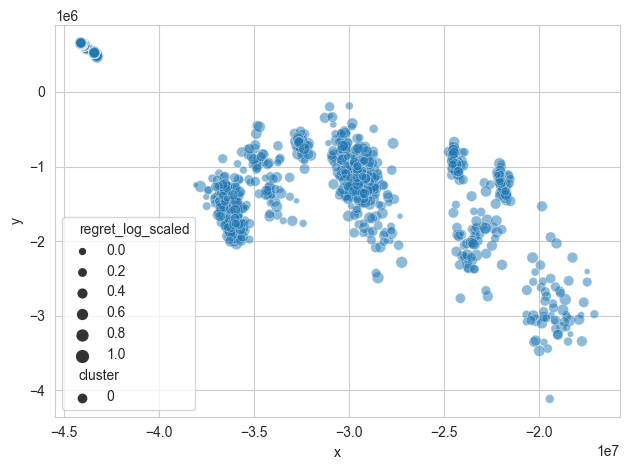

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, KMeans
from sklearn.mixture import GaussianMixture

exclude_bbob = [12, 23]
pca = PCA(n_components=2)
cluster = KMeans(n_clusters=10)

cols = [c for c in ela_feats.columns if c not in keys + ["regret", "regret_log_scaled", "x", "y", "cluster"]]
X = ela_feats[cols].to_numpy()
X_reduced = pca.fit_transform(X)
X_clustered = cluster.fit_predict(X_reduced)
ela_feats["x"] = X_reduced[:, 0]
ela_feats["cluster"] = X_clustered
ela_feats["y"] = X_reduced[:, 1]

cmap = plt.cm.get_cmap("viridis")  # , len(np.unique(X_clustered)))

# y = ela_feats["regret_log_scaled"].to_numpy()
# sizes = ela_feats["bbob_function"].to_numpy()
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(
    data=ela_feats[ela_feats["bbob_function"].apply(lambda x: x not in exclude_bbob)],
    x="x",
    y="y",
    size="regret_log_scaled",
    # hue="bbob_function",
    style="cluster",
    # palette=cmap,
    ax=ax,
    alpha=0.5,
)
# ax.get_legend().remove()
# sc = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=sizes, cmap="viridis")
# cbar = fig.colorbar(sc)
fig.set_tight_layout(True)
plt.show()

In [101]:
X.shape, X_reduced.shape, len(np.unique(X_clustered)), np.unique(X_clustered)

((7200, 38), (7200, 2), 10, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32))